In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Modelo de Rezagos Distribuidos Geométrico y Racional

## Ejemplo 18.1 Inversión en vivienda e inflación en los precios de la vivienda (hseinv.dta)

In [2]:
dfej18_1 = pd.read_stata('hseinv.dta')
dfej18_1.head()

,year,inv,pop,price,linv,lpop,lprice,t,invpc,linvpc,lprice_1,linvpc_1,gprice,ginvpc
0,1947,54864.0,144126.0,0.8190,10.912613,11.878443,-0.199671,1,0.380667,-0.965831,NaN,NaN,NaN,NaN
1,1948,64717.0,146631.0,0.8649,11.077779,11.895675,-0.145141,2,0.441360,-0.817895,-0.199671,-0.965831,0.054530,0.147935
2,1949,63150.0,149188.0,0.8456,11.053268,11.912963,-0.167709,3,0.423291,-0.859694,-0.145141,-0.817895,-0.022567,-0.041799
3,1950,86014.0,151684.0,0.8765,11.362266,11.929555,-0.131819,4,0.567060,-0.567289,-0.167709,-0.859694,0.035890,0.292405
4,1951,70610.0,154287.0,0.8819,11.164927,11.946569,-0.125677,5,0.457654,-0.781643,-0.131819,-0.567289,0.006142,-0.214353


In [ ]:
# Se utiliza MCO sobre el modelo RD de Koyck y Racional

In [ ]:
# Se busca estudiar el impacto de la inflación en la inversión en el mercado de viviendas
# La variable dependiente se pone en logaritmos, a la cual se le elimina la tendencialineal
# La independiente es la inflación, es decir el crecimiento en el índice de precios  

In [ ]:
# Se elimina la tendencia y se construyen los rezagos

In [3]:
dfej18_1['linvpc_det'] = sm.tsa.tsatools.detrend(dfej18_1['linvpc'])
dfej18_1['gprice_lag1'] = dfej18_1['gprice'].shift(1)
dfej18_1['linvpc_det_lag1'] = dfej18_1['linvpc_det'].shift(1)

In [ ]:
# Se hace la regresión con rezagos distribuidos de Koyck 

In [9]:
# Koyck geometric d.l.:
reg_koyck = smf.ols(formula='linvpc_det ~ gprice + linvpc_det_lag1',data=dfej18_1).fit()
print(reg_koyck.summary())

                            OLS Regression Results                            
Dep. Variable:             linvpc_det   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     13.02
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           4.93e-05
Time:                        00:11:26   Log-Likelihood:                 33.403
No. Observations:                  41   AIC:                            -60.81
Df Residuals:                      38   BIC:                            -55.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0100      0.018     

In [8]:
# rational d.l.:
reg_rational = smf.ols(formula='linvpc_det ~ gprice + linvpc_det_lag1 +gprice_lag1',  data=dfej18_1).fit()
print(reg_rational.summary()) 


                            OLS Regression Results                            
Dep. Variable:             linvpc_det   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     14.20
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           2.89e-06
Time:                        00:11:17   Log-Likelihood:                 37.273
No. Observations:                  40   AIC:                            -66.55
Df Residuals:                      36   BIC:                            -59.79
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0059      0.017     

In [ ]:
# Comentario : Se rechaza el modelo Geométrico pues la inflación rezagda es significativa 

In [5]:
reg_rational.pvalues['gprice_lag1']

0.004661506515167232

In [ ]:
# El R2 ajustado también es mejor en el modelo racional

In [ ]:
# El multiplicador de largo plazo en el modelo geométrico es 

In [10]:
reg_koyck.params['gprice']/(1-reg_koyck.params['linvpc_det_lag1'])

4.688434194769014

In [ ]:
# un incremento de un punto porcentual permanente en la inflación del precio residencial aumenta la inversión a 
# largo plazo en la vivienda en 4.7% por encima de su valor de tendencia
# Poco factible que eso pueda ser así

In [ ]:
# El multiplicador de largo plazo en el modelo racional es 

In [6]:
(reg_rational.params['gprice']+ reg_rational.params['gprice_lag1'])/(1-reg_rational.params['linvpc_det_lag1'])

0.7066808046888199

In [11]:
hypotheses = '(gprice +gprice_lag1=0)'
f_test = reg_rational.f_test(hypotheses)    
print (f_test)

<F test: F=array([[0.04755413]]), p=0.8286066949721947, df_denom=36, df_num=1>


In [ ]:
# No hay evidencia de que el multiplicador de largo plazo sea distinto a cero

In [ ]:
# SI acepto erróneamente el modelo geométrico, equivoco la especificación dinámica del modelo omitiendo rezagos relevantes

In [ ]:
# Prueba de Raíces unitarias

## Ejemplo 18.2 Contraste de raíz unitaria para el tipo de interés a tres meses de los bonos del Tesoro (intqrt.dta)

In [3]:
dfej18_2 = pd.read_stata('intqrt.dta')
dfej18_2.head()

,r3,r6,r12,p3,p6,hy6,hy3,spr63,hy3_1,hy6_1,...,r3_1,chy6,chy3,chy6_1,chy3_1,cr6,cr6_1,cr3_1,r6_1,cspr63
0,2.77,3.02,3.32,9931.413086,9851.647461,NaN,0.690603,0.25,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.97,3.43,3.67,9926.498047,9831.845703,0.759777,0.740466,0.46,0.690603,NaN,...,2.77,NaN,0.049863,NaN,NaN,0.41,NaN,NaN,3.02,0.21
2,4.00,4.32,4.41,9901.258789,9789.133789,0.706003,0.997260,0.32,0.740466,0.759777,...,2.97,-0.053775,0.256795,NaN,0.049863,0.89,0.41,0.20,3.43,-0.14
3,4.60,4.68,4.75,9886.615234,9771.962891,0.995813,1.146849,0.08,0.997260,0.706003,...,4.00,0.289810,0.149589,-0.053775,0.256795,0.36,0.89,1.03,4.32,-0.24
4,4.16,4.33,4.38,9897.349609,9788.656250,1.283127,1.037151,0.17,1.146849,0.995813,...,4.60,0.287315,-0.109699,0.289810,0.149589,-0.35,0.36,0.60,4.68,0.09


In [ ]:
# Se busca raíz unitaria en una serie de tasas de interés
# Se hace la regresión de la diferencia contra el rezago

In [4]:
regdfej18_2 = smf.ols('r3.diff() ~   r3.shift(1)' , data=dfej18_2).fit()
print(regdfej18_2.summary())

                            OLS Regression Results                            
Dep. Variable:              r3.diff()   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     6.116
Date:                Wed, 21 Oct 2020   Prob (F-statistic):             0.0148
Time:                        12:10:16   Log-Likelihood:                -198.80
No. Observations:                 123   AIC:                             401.6
Df Residuals:                     121   BIC:                             407.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6253      0.261      2.398      

In [ ]:
# Comentario: se recuerda que los errores estándr reportados no sirven si hay raíz unitaria
# El estimador del coeficiente del rezago puede usarse para estimar el ro, sumando una unidad

In [5]:
regdfej18_2.params['r3.shift(1)'] + 1

0.9092893810799101

In [6]:
# No puede decirse si es significativamente menor a uno PAra ello hacemos el test de Dickey Fuller
# USanos el t de la salida y lo comparamos con los valores de la Tabla Dickey Fuller

In [7]:
regdfej18_2.tvalues['r3.shift(1)']

-2.4731506198108684

In [ ]:
# Ese valor crítico es mayor al valor crítico -2.57 de rechazo al 10% 
# Por lo tanton no se puede rechazar la H0 de que rho = 1 al 10% de significatividad

In [ ]:
# Es decir, no se tiene evidencia contra la H0 (no es que se acepte que ro = 1 )

In [ ]:
# Entocnes, lo que se concluye es que debe tenerse mucho cuidado en el uso de la variable r3 en una regresión y que por ejemplo
# podría usarse la diferencia de r3 

In [ ]:
# Test Dickey Fuller Aumentado

## Ejemplo 18.3 Contraste de ruíz unitaria para la inflación anual en EE.UU (phillips.dta)

In [17]:
dfej18_3 = pd.read_stata('phillips.dta')
dfej18_3.head()

,year,unem,inf,unem_1,inf_1,unem_2,inf_2,cunem,cinf,cunem_1,cinf_1
0,1948,3.8,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1949,5.9,-1.2,3.8,8.1,NaN,NaN,2.1,-9.3,NaN,NaN
2,1950,5.3,1.3,5.9,-1.2,3.8,8.1,-0.6,2.5,2.1,-9.3
3,1951,3.3,7.9,5.3,1.3,5.9,-1.2,-2.0,6.6,-0.6,2.5
4,1952,3.0,1.9,3.3,7.9,5.3,1.3,-0.3,-6.0,-2.0,6.6


In [18]:
dfej18_3.tail()

,year,unem,inf,unem_1,inf_1,unem_2,inf_2,cunem,cinf,cunem_1,cinf_1
44,1992,7.5,3.0,6.8,4.2,5.6,5.4,0.7,-1.2,1.2,-1.2
45,1993,6.9,3.0,7.5,3.0,6.8,4.2,-0.6,0.0,0.7,-1.2
46,1994,6.1,2.6,6.9,3.0,7.5,3.0,-0.8,-0.4,-0.6,0.0
47,1995,5.6,2.8,6.1,2.6,6.9,3.0,-0.5,0.2,-0.8,-0.4
48,1996,5.4,3.0,5.6,2.8,6.1,2.6,-0.2,0.2,-0.5,0.2


In [30]:
inflation = dfej18_3['inf']

In [ ]:
# Con datos anuales de inflación, IPC, se testea raíz unitaria, con un rezago de la diferencia en la regresión DF Aumentada

In [17]:
regdfej18_3 = smf.ols('inflation.diff() ~   inflation.shift(1) +inflation.diff().shift()' , data=dfej18_3).fit()
print(regdfej18_3.summary())

                            OLS Regression Results                            
Dep. Variable:       inflation.diff()   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     4.568
Date:                Sat, 17 Oct 2020   Prob (F-statistic):             0.0158
Time:                        19:14:41   Log-Likelihood:                -98.885
No. Observations:                  47   AIC:                             203.8
Df Residuals:                      44   BIC:                             209.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [ ]:
# Comentarios: El t de la variable rezagada , del theta, es menor al valor de la Tabla -2.86 al 5%  

In [18]:
regdfej18_3.tvalues['inflation.shift(1)']

-3.02144118344197

In [ ]:
# Se rechaza la H0 , con una estimación de ro de aproximadamente 0.690

In [20]:
regdfej18_3.params['inflation.shift(1)']+1

0.6896747685117396

In [ ]:
# Hay evidencia contra la raíz unitaria de la variable inclación

In [ ]:
# El t del rezago de la variación 

In [21]:
regdfej18_3.tvalues['inflation.diff().shift()']

1.0946096572743615

In [ ]:
# siendo no significativo, por lo que parece no necesario incluuirlo. Probamos la regresión sin rezago

In [22]:
regdfej18_3a = smf.ols('inflation.diff() ~   inflation.shift(1) ' , data=dfej18_3).fit()
print(regdfej18_3a.summary())

                            OLS Regression Results                            
Dep. Variable:       inflation.diff()   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     9.790
Date:                Sat, 17 Oct 2020   Prob (F-statistic):            0.00304
Time:                        20:05:01   Log-Likelihood:                -108.22
No. Observations:                  48   AIC:                             220.4
Df Residuals:                      46   BIC:                             224.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.2767      0

In [ ]:
# Comentario: Ahora el theta es  

In [24]:
regdfej18_3a.params['inflation.shift(1)']

-0.334741405591961

In [ ]:
# y e ro

In [25]:
regdfej18_3a.params['inflation.shift(1)']+1

0.6652585944080389

In [26]:
# y el t es 

In [27]:
regdfej18_3a.tvalues['inflation.shift(1)']

-3.128952279296516

In [ ]:
# Lo que da mayor robustez a la evidencia contra la raíz untaria si no incluimos el rezago de la variación

In [ ]:
# Test Dickey Fuller con tendencia no estocástica

## Ejemplo 18.4 Raíz unltaria en el logaritmo del producto lnterior bruto de EE.UU (inven.dta)

In [28]:
dfej18_4 = pd.read_stata('inven.dta')
dfej18_4.head()

,year,i3,inf,inven,gdp,r3,cinven,cgdp,cr3,ci3,cinf,ginven,ggdp
0,1959,3.41,0.7,401.399994,2212.300049,2.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1960,2.93,1.7,412.000000,2261.699951,1.23,10.600006,49.399902,-1.48,-0.48,1.0,0.026065,0.022084
2,1961,2.38,1.0,420.899994,2309.800049,1.38,8.899994,48.100098,0.15,-0.55,-0.7,0.021372,0.021044
3,1962,2.78,1.0,440.899994,2449.100098,1.78,20.000000,139.300049,0.40,0.40,0.0,0.046423,0.058560
4,1963,3.16,1.3,459.000000,2554.000000,1.86,18.100006,104.899902,0.08,0.38,0.3,0.040232,0.041940


In [ ]:
# A la serie del log(GDP) se busca testear raíz unitaria con tendencia no estocástica
# La serie tiene una tendencia que parece lineal

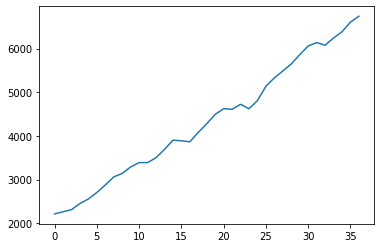

In [33]:
dfej18_4.gdp.plot()

In [ ]:
# Se inlcuye un solo rezago de la varaición del logaritmo , que es simplemente la tasa de crecimiento
# para dar cuenta de la dinámica

In [ ]:
# ggdp es la tasa de crecimiento que es igual que la variación del logaritmo 

In [29]:
regdfej18_4 = smf.ols('ggdp ~   year + np.log(gdp.shift(1)) + ggdp.shift(1)' , data=dfej18_4).fit()
print(regdfej18_4.summary())

                            OLS Regression Results                            
Dep. Variable:                   ggdp   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     3.783
Date:                Sat, 17 Oct 2020   Prob (F-statistic):             0.0201
Time:                        23:18:26   Log-Likelihood:                 89.183
No. Observations:                  35   AIC:                            -170.4
Df Residuals:                      31   BIC:                            -164.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -9.8418 

In [35]:
regdfej18_4.params['np.log(gdp.shift(1))'] + 1

0.7903790762943923

In [ ]:
# que es claramente menor a 1, pero no puede rechazarse la H0 pues la significatividad está muy a derecha del crítico
# al 10% , -3.12

In [36]:
regdfej18_4.tvalues['np.log(gdp.shift(1))']

-2.42073296245074

In [ ]:
# La varaición rezagada del logaritmo , tiene baja significatividad

In [37]:
regdfej18_4.tvalues['ggdp.shift(1)']

1.6010171110850409

In [38]:
regdfej18_4.pvalues['ggdp.shift(1)']

0.11951607850544346

In [ ]:
# En conclusión no puede rechazarse H0 pero el estimador puntual no está muy cerca de 1. Esto es por el tamaño pequeño
# de muestra

In [ ]:
# En general se supone que esto indicaría que el log(dgp) es I(1) y que el crecimiento en GPD es I(0) pero los tamaño de 
# muestras no permiten confiar en esas conlcusiones 

In [ ]:
# Si se saca la tendencia de la regresión

In [39]:
regdfej18_4a = smf.ols('ggdp ~    np.log(gdp.shift(1)) + ggdp.shift(1)' , data=dfej18_4).fit()
print(regdfej18_4a.summary())

                            OLS Regression Results                            
Dep. Variable:                   ggdp   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     2.959
Date:                Sat, 17 Oct 2020   Prob (F-statistic):             0.0662
Time:                        23:43:00   Log-Likelihood:                 86.693
No. Observations:                  35   AIC:                            -167.4
Df Residuals:                      32   BIC:                            -162.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.2149 

In [40]:
regdfej18_4a.params['np.log(gdp.shift(1))']

-0.022687541771458253

In [41]:
regdfej18_4a.tvalues['np.log(gdp.shift(1))']

-1.9082138265184063

In [ ]:
# Hay menos evidencia contra la H0 y el rho se acerca ás al 1

In [42]:
regdfej18_4a.params['np.log(gdp.shift(1))']+1

0.9773124582285417

In [ ]:
# pero eso en engañoso pro la tendencia omitida

In [11]:
dfej18_4['lgdp'] = np.log(dfej18_4['gdp'])

# automated ADF:
res_ADF_aut = sm.tsa.stattools.adfuller(dfej18_4['lgdp'], maxlag=1, autolag=None,
                                        regression='ct', regresults=True)
ADF_stat_aut = res_ADF_aut[0]
ADF_pval_aut = res_ADF_aut[1]
table = pd.DataFrame({'names': res_ADF_aut[3].resols.model.exog_names,
                      'b': np.round(res_ADF_aut[3].resols.params, 4),
                      'se': np.round(res_ADF_aut[3].resols.bse, 4),
                      't': np.round(res_ADF_aut[3].resols.tvalues, 4),
                      'pval': np.round(res_ADF_aut[3].resols.pvalues, 4)})
print(f'table: \n{table}\n')
print(f'ADF_stat_aut: {ADF_stat_aut}\n')
print(f'ADF_pval_aut: {ADF_pval_aut}\n')


table: 
   names       b      se       t    pval
0     x1 -0.2096  0.0866 -2.4207  0.0215
1     x2  0.2637  0.1647  1.6010  0.1195
2  const  1.6627  0.6717  2.4752  0.0190
3     x3  0.0059  0.0027  2.1772  0.0372

ADF_stat_aut: -2.4207219969767375

ADF_pval_aut: 0.36866156928030924



## Ejemplo 18.5 Análisis de cointegración entre fertilidad y exención fiscal personal (fertil3.dta)

In [34]:
dfej18_5 = pd.read_stata('fertil3.dta')
dfej18_5.head()

,gfr,pe,year,t,tsq,pe_1,pe_2,pe_3,pe_4,pill,...,cpe_1,cpe_2,cpe_3,cpe_4,gfr_1,cgfr_1,cgfr_2,cgfr_3,cgfr_4,gfr_2
0,124.699997,0.00,1913,1,1,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126.599998,0.00,1914,2,4,0.0,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,124.699997,NaN,NaN,NaN,NaN,NaN
2,125.000000,0.00,1915,3,9,0.0,0.0,NaN,NaN,0,...,0.0,NaN,NaN,NaN,126.599998,1.900002,NaN,NaN,NaN,124.699997
3,123.400002,0.00,1916,4,16,0.0,0.0,0.0,NaN,0,...,0.0,0.0,NaN,NaN,125.000000,-1.599998,1.900002,NaN,NaN,126.599998
4,121.000000,19.27,1917,5,25,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,NaN,123.400002,-1.599998,-1.599998,1.900002,NaN,125.000000


In [37]:
regdfej18_5 = smf.ols('gfr ~  pe + t' , data=dfej18_5).fit()
print(regdfej18_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    gfr   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     34.53
Date:                Sat, 18 Jul 2020   Prob (F-statistic):           4.06e-11
Time:                        22:56:15   Log-Likelihood:                -291.68
No. Observations:                  72   AIC:                             589.4
Df Residuals:                      69   BIC:                             596.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    109.9302      3.475     31.632      0.0

In [36]:
regdfej18_5a = smf.ols('gfr.diff() ~  pe.diff()' , data=dfej18_5).fit()
print(regdfej18_5a.summary())

                            OLS Regression Results                            
Dep. Variable:             gfr.diff()   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.263
Date:                Sat, 18 Jul 2020   Prob (F-statistic):              0.137
Time:                        22:55:19   Log-Likelihood:                -201.97
No. Observations:                  71   AIC:                             407.9
Df Residuals:                      69   BIC:                             412.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7848      0.502     -1.563      0.1

## Ejemplo 18.6 Parámetro de cointegración para los tipos de interés (intqrt.dta)

In [79]:
dfej18_6 = pd.read_stata('intqrt.dta')
dfej18_6.head()

,r3,r6,r12,p3,p6,hy6,hy3,spr63,hy3_1,hy6_1,...,r3_1,chy6,chy3,chy6_1,chy3_1,cr6,cr6_1,cr3_1,r6_1,cspr63
0,2.77,3.02,3.32,9931.413086,9851.647461,NaN,0.690603,0.25,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.97,3.43,3.67,9926.498047,9831.845703,0.759777,0.740466,0.46,0.690603,NaN,...,2.77,NaN,0.049863,NaN,NaN,0.41,NaN,NaN,3.02,0.21
2,4.00,4.32,4.41,9901.258789,9789.133789,0.706003,0.997260,0.32,0.740466,0.759777,...,2.97,-0.053775,0.256795,NaN,0.049863,0.89,0.41,0.20,3.43,-0.14
3,4.60,4.68,4.75,9886.615234,9771.962891,0.995813,1.146849,0.08,0.997260,0.706003,...,4.00,0.289810,0.149589,-0.053775,0.256795,0.36,0.89,1.03,4.32,-0.24
4,4.16,4.33,4.38,9897.349609,9788.656250,1.283127,1.037151,0.17,1.146849,0.995813,...,4.60,0.287315,-0.109699,0.289810,0.149589,-0.35,0.36,0.60,4.68,0.09


## Ejemplo 18.7 (Modelo de corrección del error para el rendimiento de los bonos* (intqrt.dta)

In [80]:
regdfej18_7 = smf.ols('hy6 ~  hy3.shift(1)' , data=dfej18_6).fit()
print(regdfej18_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    hy6   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     783.2
Date:                Sun, 19 Jul 2020   Prob (F-statistic):           1.11e-54
Time:                        02:39:56   Log-Likelihood:                -36.934
No. Observations:                 123   AIC:                             77.87
Df Residuals:                     121   BIC:                             83.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0579      0.070     -0.828   

In [81]:
dfej18_6['res'] = regdfej18_7.resid

In [75]:
dfej18_6.head()

,r3,r6,r12,p3,p6,hy6,hy3,spr63,hy3_1,hy6_1,...,chy6,chy3,chy6_1,chy3_1,cr6,cr6_1,cr3_1,r6_1,cspr63,res
3,4.60,4.68,4.75,9886.615234,9771.962891,0.995813,1.146849,0.08,0.997260,0.706003,...,0.289810,0.149589,-0.053775,0.256795,0.36,0.89,1.03,4.32,-0.24,-0.047527
4,4.16,4.33,4.38,9897.349609,9788.656250,1.283127,1.037151,0.17,1.146849,0.995813,...,0.287315,-0.109699,0.289810,0.149589,-0.35,0.36,0.60,4.68,0.09,0.074595
5,3.07,3.50,3.82,9924.041992,9828.472656,1.383088,0.765397,0.43,1.037151,1.283127,...,0.099961,-0.271753,0.287315,-0.109699,-0.83,-0.35,-0.44,4.33,0.26,0.295697
6,2.60,2.84,2.95,9935.595703,9860.366211,1.089926,0.648219,0.24,0.765397,1.383088,...,-0.293162,-0.117178,0.099961,-0.271753,-0.66,-0.83,-1.09,3.50,-0.19,0.302634
7,2.34,2.67,2.99,9941.999023,9868.615234,0.827888,0.583397,0.33,0.648219,1.089926,...,-0.262037,-0.064822,-0.293162,-0.117178,-0.17,-0.66,-0.47,2.84,0.09,0.169998


In [88]:
regdfej18_7a = smf.ols('hy6.diff() ~ hy3.diff().shift(1)  + res.shift(1)  ' , data=dfej18_6).fit()
print(regdfej18_7a.summary())

                            OLS Regression Results                            
Dep. Variable:             hy6.diff()   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     238.7
Date:                Sun, 19 Jul 2020   Prob (F-statistic):           2.26e-42
Time:                        21:03:42   Log-Likelihood:                -37.032
No. Observations:                 122   AIC:                             80.06
Df Residuals:                     119   BIC:                             88.48
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0015    

In [90]:
resta = dfej18_6['hy6'].shift(1)-dfej18_6['hy3'].shift(2)

In [91]:
regdfej18_7b = smf.ols('hy6.diff() ~ hy3.diff().shift(1)  + resta  ' , data=dfej18_6).fit()
print(regdfej18_7b.summary())

                            OLS Regression Results                            
Dep. Variable:             hy6.diff()   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     223.8
Date:                Sun, 19 Jul 2020   Prob (F-statistic):           4.74e-41
Time:                        21:17:54   Log-Likelihood:                -40.152
No. Observations:                 122   AIC:                             86.30
Df Residuals:                     119   BIC:                             94.72
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0898    

## Ejemplo 18.8 Predlcclón de la tasa de desempleo de EE.UU* (phillips.dta)

In [19]:
# define yearly time series beginning in 1948:
date_range = pd.date_range(start='1948', periods=len(dfej18_3), freq='Y')
dfej18_3.index = date_range.year

In [21]:
dfej18_3.tail(3)

,year,unem,inf,unem_1,inf_1,unem_2,inf_2,cunem,cinf,cunem_1,cinf_1
1994,1994,6.1,2.6,6.9,3.0,7.5,3.0,-0.8,-0.4,-0.6,0.0
1995,1995,5.6,2.8,6.1,2.6,6.9,3.0,-0.5,0.2,-0.8,-0.4
1996,1996,5.4,3.0,5.6,2.8,6.1,2.6,-0.2,0.2,-0.5,0.2


In [23]:
# estimate models:
yt96 = (dfej18_3['year'] <= 1986)
reg_1 = smf.ols(formula='unem ~ unem_1', data=dfej18_3, subset=yt96)
results_1 = reg_1.fit()
reg_2 = smf.ols(formula='unem ~ unem_1 + inf_1', data=dfej18_3, subset=yt96)
results_2 = reg_2.fit()

In [ ]:
# Nota : PUSE 86 en vez de 96 , pues NO SE COMO HACER PRONOSTICO UN PASO ADELANTE
# Eso lo vi para sarimax, pero no para ols
# La base está hasta 96. No hay manera de estirarla automáticamente. 

In [24]:
# predictions for 1997-2003 including 95% forecast intervals:
yf97 = (dfej18_3['year'] > 1986)
pred_1 = results_1.get_prediction(dfej18_3[yf97])
pred_1_FI = pred_1.summary_frame(alpha=0.05)[['mean', 'obs_ci_lower', 'obs_ci_upper']]
pred_1_FI.index = date_range.year[yf97]
print(f'pred_1_FI: \n{pred_1_FI}\n')

pred_2 = results_2.get_prediction(dfej18_3[yf97])
pred_2_FI = pred_2.summary_frame(alpha=0.05)[['mean', 'obs_ci_lower', 'obs_ci_upper']]
pred_2_FI.index = date_range.year[yf97]
print(f'pred_2_FI: \n{pred_2_FI}\n')

pred_1_FI: 
          mean  obs_ci_lower  obs_ci_upper
1987  6.728320      4.358587      9.098053
1988  6.134006      3.780765      8.487246
1989  5.613981      3.264189      7.963773
1990  5.465402      3.114702      7.816103
1991  5.688270      3.338617      8.037923
1992  6.579742      4.215376      8.944108
1993  7.099767      4.713039      9.486495
1994  6.654031      4.287085      9.020977
1995  6.059717      3.707599      8.411834
1996  5.688270      3.338617      8.037923

pred_2_FI: 
          mean  obs_ci_lower  obs_ci_upper
1987  6.151638      4.121635      8.181640
1988  5.948749      3.952652      7.944845
1989  5.592122      3.601240      7.583004
1990  5.591276      3.598582      7.583970
1991  5.891799      3.898257      7.885341
1992  6.440977      4.436481      8.445473
1993  6.670647      4.636236      8.705058
1994  6.287239      4.272811      8.301667
1995  5.703481      3.702075      7.704887
1996  5.420248      3.424645      7.415850



rmse1: 0.5934560874341179

rmse2: 0.4831422317894614

mae1: 0.5144676971461742

mae2: 0.3305501839402959



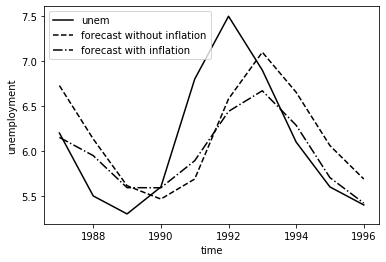

In [25]:
# forecast errors:
e1 = dfej18_3[yf97]['unem'] - pred_1_FI['mean']
e2 = dfej18_3[yf97]['unem'] - pred_2_FI['mean']

# RMSE and MAE:
rmse1 = np.sqrt(np.mean(e1 ** 2))
print(f'rmse1: {rmse1}\n')
rmse2 = np.sqrt(np.mean(e2 ** 2))
print(f'rmse2: {rmse2}\n')
mae1 = np.mean(abs(e1))
print(f'mae1: {mae1}\n')
mae2 = np.mean(abs(e2))
print(f'mae2: {mae2}\n')

# graph:
plt.plot(dfej18_3[yf97]['unem'], color='black', marker='', label='unem')
plt.plot(pred_1_FI['mean'], color='black',
         marker='', linestyle='--', label='forecast without inflation')
plt.plot(pred_2_FI['mean'], color='black',
         marker='', linestyle='-.', label='forecast with inflation')
plt.ylabel('unemployment')
plt.xlabel('time')
plt.legend()

In [31]:
regdfej18_8a = smf.ols('unem ~ unem.shift(1)   ' , data=dfej18_3).fit()
print(regdfej18_8a.summary())

                            OLS Regression Results                            
Dep. Variable:                   unem   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     57.13
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           1.33e-09
Time:                        00:36:02   Log-Likelihood:                -69.364
No. Observations:                  48   AIC:                             142.7
Df Residuals:                      46   BIC:                             146.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.5717      0.577      2.723

In [32]:
regdfej18_8b = smf.ols('unem ~ unem.shift(1) + inflation.shift(1)  ' , data=dfej18_3).fit()
print(regdfej18_8b.summary())

                            OLS Regression Results                            
Dep. Variable:                   unem   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     50.22
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           3.44e-12
Time:                        00:36:04   Log-Likelihood:                -60.587
No. Observations:                  48   AIC:                             127.2
Df Residuals:                      45   BIC:                             132.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.3038      0

In [41]:
regdfej18_8a.fittedvalues[-1:]

1996    5.672923
dtype: float64

In [37]:
regdfej18_8b.fittedvalues[-1:]

1996    5.441158
dtype: float64

In [40]:
regdfej18_8a.params[0]+regdfej18_8a.params[1]*dfej18_3.unem[-1:]

1996    5.526452
Name: unem, dtype: float32

In [43]:
regdfej18_8b.params[0]+regdfej18_8b.params[1]*dfej18_3.unem[-1:]+regdfej18_8b.params[2]*dfej18_3.inf[-1:]

1996    5.348468
dtype: float32

## Ejemplo 18.9 Comparaciones fuera de la muestra de las predicciones de desempleo* (phillips.dta)

## Ejemplo 18.10 Predicción de horizonte dos años de la tása de desempleo* (phillips.dta)

In [97]:
regdfej18_10 = smf.ols('inflation ~ inflation.shift()  ' , data=dfej18_3).fit()
print(regdfej18_10.summary())

                            OLS Regression Results                            
Dep. Variable:              inflation   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     38.67
Date:                Sun, 19 Jul 2020   Prob (F-statistic):           1.36e-07
Time:                        21:57:40   Log-Likelihood:                -108.22
No. Observations:                  48   AIC:                             220.4
Df Residuals:                      46   BIC:                             224.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.2767      0.55